In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
import seaborn as sns
import pymc3 as pm
plt.style.use('seaborn-darkgrid')

# Probabilistic Programming - Introduction for PyMC3

### 2.2 Monte Carloシミュレーションで円周率を計算する

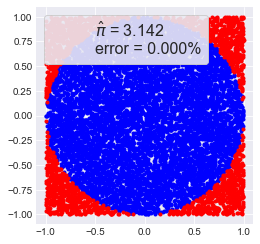

In [69]:
N = 10000
x, y = np.random.uniform(-1, 1, size=(2, N))
inside = (x**2 + y**2) <= 1
pi = inside.sum()*4/N
error = abs((pi - np.pi)/pi) * 100

outside = np.invert(inside)

plt.plot(x[inside], y[inside], 'b.')
plt.plot(x[outside], y[outside], 'r.')
plt.plot(0, 0, label='$\hat\pi$ = {:4.3f}\nerror = {:4.3f}%'.format(pi, error), alpha=0)
plt.axis('square')
plt.legend(frameon=True, framealpha=0.9, fontsize=16);

## コイン投げ問題の計算的なアプローチ

### 2.5 事後分布をサンプリングし，トレースプロットする (1)

In [231]:
np.random.seed(7)
n_experiments = 16
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
print(data)

[0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1]


### 2.6 事後分布をサンプリングし，トレースプロットする (2)

In [248]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, start=start)

logp = -11.09, ||grad|| = 2: 100%|██████████| 7/7 [00:00<00:00, 883.06it/s]
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:04<00:00, 4985.22draws/s]
The number of effective samples is smaller than 25% for some parameters.


### 2.7 事後分布をサンプリングし，トレースプロットする (3)

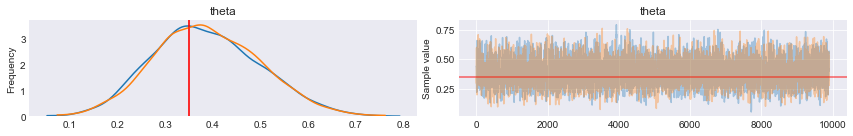

In [249]:
burnin = 100
chain = trace[burnin:]
pm.traceplot(chain, lines={'theta':theta_real});

### 2.8 事後分布をサンプリングし，トレースプロットする (4)

In [250]:
with our_first_model:
    step = pm.Metropolis()
    multi_trace = pm.sample(1000, step=step, njobs=4)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3967.88draws/s]
The number of effective samples is smaller than 25% for some parameters.


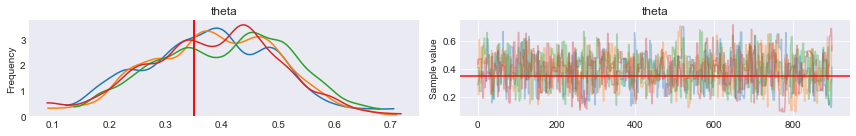

In [251]:
burnin = 100
multi_chain = multi_trace[burnin:]
pm.traceplot(multi_chain, lines={'theta':theta_real});

### 2.10 事後分布を並列サンプリングし，平均，50％，95％HPD,およびR^を出力する

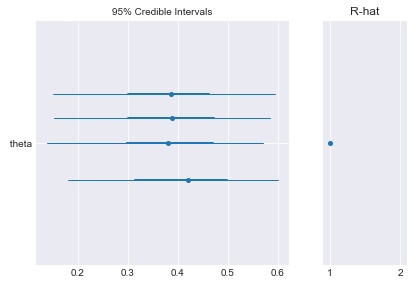

In [252]:
pm.gelman_rubin(multi_chain)
pm.forestplot(multi_chain, varnames={'theta'})

### 2.12 pm.summary(multi_chain)

In [253]:
pm.summary(multi_chain)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theta,0.388608,0.1166,0.004286,0.16856,0.603626,722.129103,1.004151


In [254]:
pm.effective_n(multi_chain)['theta']

722.1291034366573

### 2.14 事後分布と95%HPDを出力

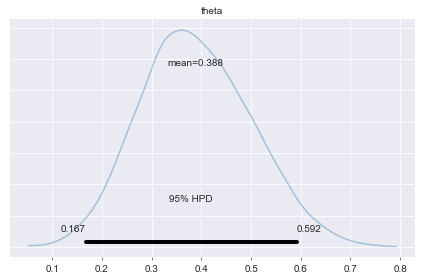

In [255]:
pm.plot_posterior(chain, kde_plot=True)

### 2.15 事後分布とROPEを出力

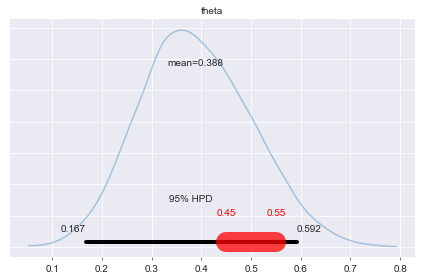

In [256]:
pm.plot_posterior(chain, kde_plot=True, rope=[0.45, 0.55])

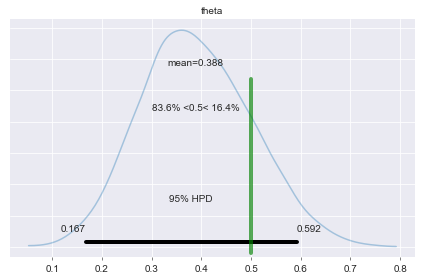

In [257]:
pm.plot_posterior(chain, kde_plot=True, ref_val=0.5)